In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [69]:
def parse_beam_numbers(test_cases):
    """
    Parse test cases and extract the last two numbers after '&' symbols.

    Args:
        test_cases (list): List of strings, each containing a test case

    Returns:
        tuple: Two lists containing the first and second numbers respectively
    """
    first_numbers = []
    second_numbers = []

    for test_case in test_cases:
        parts = [part.strip() for part in test_case.split('&')]

        if len(parts) == 3:
            first_numbers.append(int(parts[-2]))
            second_numbers.append(int(parts[-1]))

    return first_numbers, second_numbers

test_cases = [
    "+ * P 7 5 * ^ a0 P 4 * ^ a1 P 3 ^ a2 P 2 + * N 5 1 * a0 * ^ a1 P 6 ^ a2 P 2 + * P 2 1 * ^ a0 P 3 * ^ a1 P 3 ^ a2 P 3 + * P 5 1 * ^ a1 P 6 ^ a2 P 3 + * N 9 * ^ a0 P 5 ^ a2 P 4 + * N 6 0 * ^ a0 P 2 * ^ a1 P 3 ^ a2 P 4 + * N 9 * ^ a0 P 4 ^ a2 P 5 + * N 7 2 * a0 * ^ a1 P 3 ^ a2 P 5 + * P 3 6 * ^ a0 P 3 ^ a2 P 6 + * P 3 6 * ^ a1 P 3 ^ a2 P 6 * N 1 8 * ^ a0 P 2 ^ a2 P 7 & 50 & 43",
    "+ * P 5 4 * ^ a0 P 7 ^ a2 P 2 + * N 9 0 * ^ a0 P 6 * a1 ^ a2 P 2 ... & 40 & 24",
]

transformer_lc, mma_lc = parse_beam_numbers(test_cases)
print("transformer_lc:", transformer_lc)
print("mma_lc:", mma_lc)

transformer_lc: [50, 40]
mma_lc: [43, 24]


In [70]:
def read_test_cases(file_path):
    """
    Read test cases from a file, where each line is a test case.

    Args:
        file_path (str): Path to the test cases file

    Returns:
        list: List of test cases as strings
    """
    test_cases = []

    try:
        with open(file_path, 'r') as file:
            # Read each line and strip whitespace
            test_cases = [line.strip() for line in file if line.strip()]

    except FileNotFoundError:
        print(f"Error: File '{file_path}' not found.")
    except Exception as e:
        print(f"Error reading file: {str(e)}")

    return test_cases

def get_correct_cases(test_cases, correct_indices):
    """
    Get the test cases that were correct based on their indices.

    Args:
        test_cases (list): List of all test cases
        correct_indices (list): List of indices where the model was correct

    Returns:
        list: List of correct test cases
    """
    return [test_cases[i] for i in correct_indices]

In [ ]:
def plot_overlaid_distributions(test_cases, beam_width_results, beam_width=50):
    """
    Create overlaid distribution plot for leaf counts of transformer vs Mathematica
    """
    # Get the correct cases for beam width 50
    correct_cases = get_correct_cases(test_cases, beam_width_results[beam_width])
    transformer_leafcount, mma_leafcount = parse_beam_numbers(correct_cases)

    # Create figure
    plt.figure(figsize=(10, 6))

    # Calculate the kernel density estimation for both distributions
    kde_transformer = stats.gaussian_kde(transformer_leafcount)
    kde_mma = stats.gaussian_kde(mma_leafcount)

    # Create evaluation points
    x_min = min(min(transformer_leafcount), min(mma_leafcount))
    x_max = max(max(transformer_leafcount), max(mma_leafcount))
    x_eval = np.linspace(x_min, x_max, 200)

    # Plot the KDE
    plt.plot(x_eval, kde_transformer(x_eval), 'b-', label='Transformer', linewidth=2)
    plt.plot(x_eval, kde_mma(x_eval), 'g-', label='Mathematica', linewidth=2)

    # Fill the area under the curves
    plt.fill_between(x_eval, kde_transformer(x_eval), alpha=0.3, color='blue')
    plt.fill_between(x_eval, kde_mma(x_eval), alpha=0.3, color='green')

    # Add vertical lines for means
    plt.axvline(np.mean(transformer_leafcount), color='blue', linestyle='--', alpha=0.5,
                label=f'Transformer Mean: {np.mean(transformer_leafcount):.2f}')
    plt.axvline(np.mean(mma_leafcount), color='green', linestyle='--', alpha=0.5,
                label=f'Mathematica Mean: {np.mean(mma_leafcount):.2f}')

    # Customize the plot
    plt.xlabel('Leaf Count')
    plt.ylabel('Density')
    plt.title(f'Distribution of Leaf Counts (Beam Width {beam_width})')
    plt.legend()
    plt.grid(True, alpha=0.3)

    # Add statistics annotation
    stats_text = (f'Transformer: mean={np.mean(transformer_leafcount):.2f}, '
                 f'std={np.std(transformer_leafcount):.2f}\n'
                 f'Mathematica: mean={np.mean(mma_leafcount):.2f}, '
                 f'std={np.std(mma_leafcount):.2f}')
    plt.text(0.5, 0.95, stats_text, horizontalalignment='center',
             verticalalignment='center', transform=plt.gca().transAxes,
             bbox=dict(facecolor='white', alpha=0.8))

    plt.tight_layout()
    plt.show()

# Exp 12 Leaf Count (Transformer vs. MMA)

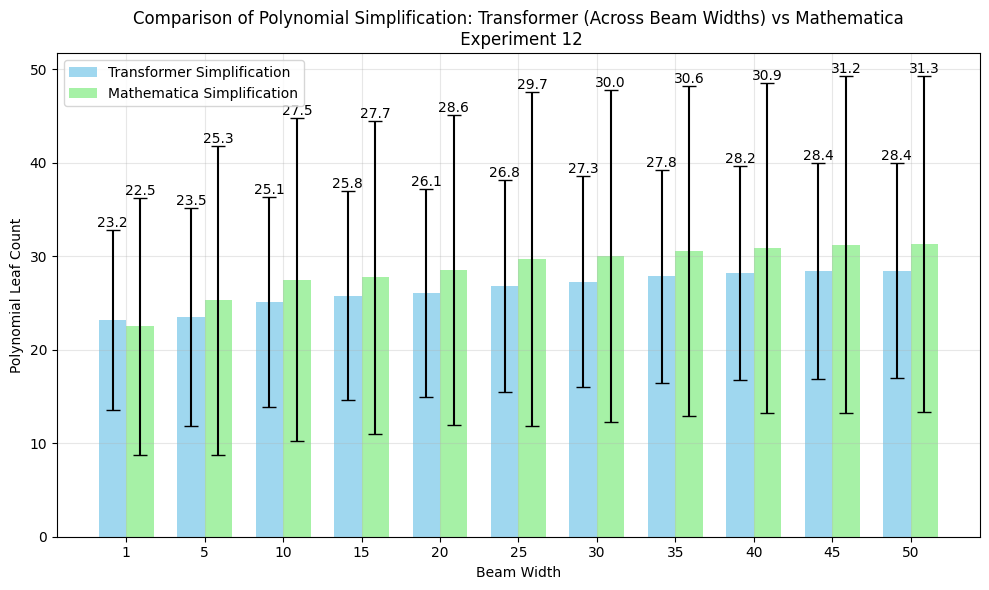

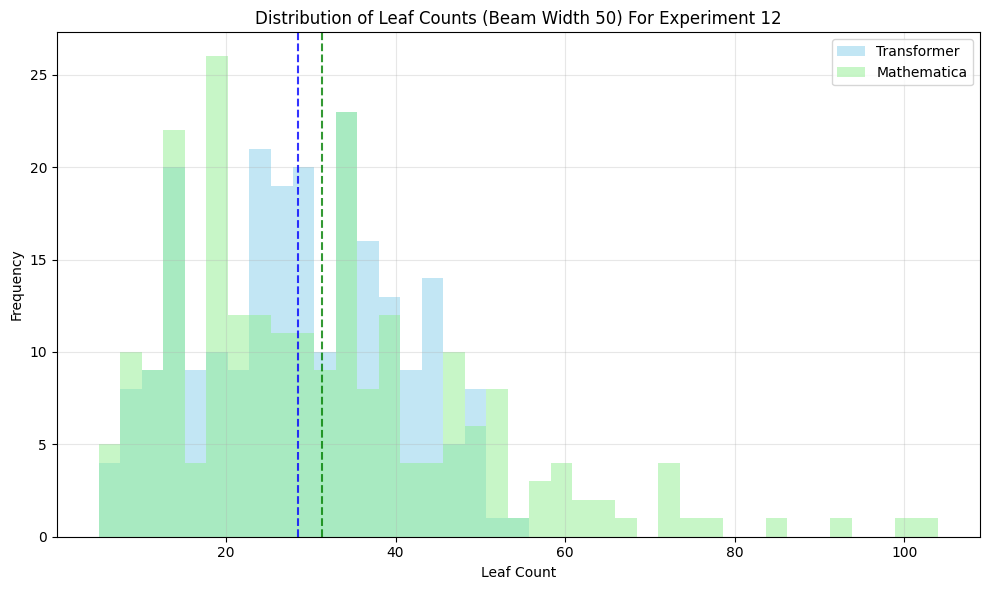

In [72]:
exp_num = 12
# NOTE : Change for each experiment
file_path = "data/data4_test_2_leafcount.txt"
test_cases_leafcount = read_test_cases(file_path)

# NOTE : change for each experiment
exp12_beam_width_results = { 1 : [2, 9, 13, 15, 24, 38, 43, 45, 58, 59, 61, 62, 83, 88, 107, 111, 113, 117, 128, 136, 137, 165, 179, 185, 198, 209, 214, 218, 219, 221, 241, 253, 261, 267, 268, 277, 279, 294, 296],
                5 : [2, 3, 9, 13, 15, 22, 24, 29, 30, 32, 34, 38, 40, 42, 43, 45, 48, 49, 52, 56, 58, 59, 61, 62, 65, 69, 74, 82, 83, 85, 87, 88, 90, 93, 95, 100, 107, 110, 111, 113, 117, 118, 122, 124, 128, 129, 136, 137, 138, 149, 151, 160, 161, 165, 168, 172, 174, 178, 179, 180, 184, 185, 194, 195, 198, 209, 212, 214, 215, 218, 219, 221, 241, 250, 253, 254, 258, 260, 261, 262, 263, 265, 267, 268, 274, 276, 277, 278, 279, 285, 288, 289, 294, 296],
                10 : [0, 2, 3, 7, 9, 13, 15, 18, 22, 24, 25, 29, 30, 32, 34, 35, 38, 40, 42, 43, 45, 46, 48, 49, 52, 56, 57, 58, 59, 61, 62, 63, 65, 69, 72, 74, 82, 83, 85, 87, 88, 90, 93, 94, 95, 100, 104, 106, 107, 110, 111, 113, 115, 117, 118, 122, 124, 128, 129, 130, 133, 136, 137, 138, 144, 149, 151, 152, 160, 161, 165, 166, 168, 169, 172, 174, 178, 179, 180, 184, 185, 187, 189, 192, 193, 194, 195, 196, 198, 200, 201, 202, 204, 208, 209, 211, 212, 214, 215, 216, 218, 219, 221, 223, 224, 225, 227, 229, 230, 233, 238, 240, 241, 246, 248, 250, 251, 253, 254, 257, 258, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 274, 275, 276, 277, 278, 279, 281, 285, 288, 289, 294, 296, 298],
                15 : [0, 2, 3, 4, 5, 7, 9, 13, 15, 18, 22, 24, 25, 26, 29, 30, 32, 34, 35, 38, 40, 42, 43, 45, 46, 48, 49, 52, 56, 57, 58, 59, 61, 62, 63, 65, 69, 72, 74, 82, 83, 85, 87, 88, 90, 93, 94, 95, 100, 101, 104, 106, 107, 110, 111, 113, 115, 117, 118, 122, 124, 126, 128, 129, 130, 133, 135, 136, 137, 138, 144, 149, 150, 151, 152, 155, 158, 160, 161, 165, 166, 168, 169, 172, 174, 178, 179, 180, 184, 185, 186, 187, 189, 192, 193, 194, 195, 196, 198, 199, 200, 201, 202, 204, 208, 209, 211, 212, 214, 215, 216, 218, 219, 221, 223, 224, 225, 227, 229, 230, 233, 238, 240, 241, 243, 246, 248, 250, 251, 253, 254, 255, 257, 258, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 274, 275, 276, 277, 278, 279, 281, 285, 288, 289, 293, 294, 296, 297, 298],
                20 : [0, 2, 3, 4, 5, 7, 9, 13, 15, 16, 18, 22, 24, 25, 26, 29, 30, 32, 34, 35, 38, 40, 42, 43, 44, 45, 46, 47, 48, 49, 52, 53, 56, 57, 58, 59, 61, 62, 63, 64, 65, 69, 72, 74, 76, 82, 83, 85, 87, 88, 90, 93, 94, 95, 98, 100, 101, 104, 106, 107, 110, 111, 113, 115, 117, 118, 122, 123, 124, 126, 128, 129, 130, 131, 133, 135, 136, 137, 138, 144, 149, 150, 151, 152, 153, 155, 158, 160, 161, 165, 166, 168, 169, 172, 174, 175, 178, 179, 180, 183, 184, 185, 186, 187, 189, 192, 193, 194, 195, 196, 198, 199, 200, 201, 202, 204, 206, 208, 209, 211, 212, 214, 215, 216, 218, 219, 221, 222, 223, 224, 225, 226, 227, 229, 230, 233, 236, 238, 240, 241, 243, 246, 248, 250, 251, 253, 254, 255, 257, 258, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 274, 275, 276, 277, 278, 279, 281, 285, 287, 288, 289, 293, 294, 296, 297, 298],
                25 : [0, 2, 3, 4, 5, 7, 9, 13, 15, 16, 18, 21, 22, 23, 24, 25, 26, 27, 29, 30, 32, 34, 35, 36, 38, 39, 40, 42, 43, 44, 45, 46, 47, 48, 49, 52, 53, 54, 56, 57, 58, 59, 61, 62, 63, 64, 65, 69, 72, 74, 76, 77, 81, 82, 83, 85, 87, 88, 90, 92, 93, 94, 95, 98, 100, 101, 104, 106, 107, 110, 111, 113, 114, 115, 117, 118, 122, 123, 124, 125, 126, 128, 129, 130, 131, 133, 135, 136, 137, 138, 144, 149, 150, 151, 152, 153, 155, 158, 160, 161, 165, 166, 168, 169, 172, 173, 174, 175, 176, 178, 179, 180, 183, 184, 185, 186, 187, 189, 192, 193, 194, 195, 196, 198, 199, 200, 201, 202, 204, 206, 208, 209, 211, 212, 214, 215, 216, 218, 219, 221, 222, 223, 224, 225, 226, 227, 229, 230, 233, 236, 238, 240, 241, 243, 246, 248, 250, 251, 253, 254, 255, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 274, 275, 276, 277, 278, 279, 280, 281, 285, 286, 287, 288, 289, 291, 293, 294, 296, 297, 298],
                30 : [0, 1, 2, 3, 4, 5, 6, 7, 9, 13, 15, 16, 18, 21, 22, 23, 24, 25, 26, 27, 29, 30, 32, 34, 35, 36, 38, 39, 40, 42, 43, 44, 45, 46, 47, 48, 49, 50, 52, 53, 54, 56, 57, 58, 59, 61, 62, 63, 64, 65, 66, 68, 69, 72, 74, 76, 77, 81, 82, 83, 85, 87, 88, 90, 92, 93, 94, 95, 98, 100, 101, 104, 106, 107, 110, 111, 113, 114, 115, 117, 118, 122, 123, 124, 125, 126, 128, 129, 130, 131, 133, 135, 136, 137, 138, 142, 144, 145, 149, 150, 151, 152, 153, 155, 158, 160, 161, 163, 164, 165, 166, 168, 169, 172, 173, 174, 175, 176, 178, 179, 180, 183, 184, 185, 186, 187, 189, 192, 193, 194, 195, 196, 198, 199, 200, 201, 202, 204, 206, 208, 209, 211, 212, 214, 215, 216, 218, 219, 221, 222, 223, 224, 225, 226, 227, 229, 230, 233, 236, 238, 240, 241, 242, 243, 244, 246, 248, 250, 251, 253, 254, 255, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 274, 275, 276, 277, 278, 279, 280, 281, 285, 286, 287, 288, 289, 291, 293, 294, 296, 297, 298],
                35 : [0, 1, 2, 3, 4, 5, 6, 7, 9, 13, 15, 16, 18, 21, 22, 23, 24, 25, 26, 27, 29, 30, 32, 34, 35, 36, 38, 39, 40, 42, 43, 44, 45, 46, 47, 48, 49, 50, 52, 53, 54, 56, 57, 58, 59, 61, 62, 63, 64, 65, 66, 67, 68, 69, 72, 74, 76, 77, 81, 82, 83, 85, 87, 88, 90, 92, 93, 94, 95, 98, 100, 101, 104, 105, 106, 107, 110, 111, 113, 114, 115, 117, 118, 122, 123, 124, 125, 126, 128, 129, 130, 131, 133, 134, 135, 136, 137, 138, 142, 144, 145, 148, 149, 150, 151, 152, 153, 155, 158, 160, 161, 162, 163, 164, 165, 166, 168, 169, 172, 173, 174, 175, 176, 178, 179, 180, 183, 184, 185, 186, 187, 189, 191, 192, 193, 194, 195, 196, 198, 199, 200, 201, 202, 204, 206, 208, 209, 211, 212, 213, 214, 215, 216, 218, 219, 221, 222, 223, 224, 225, 226, 227, 229, 230, 233, 236, 237, 238, 240, 241, 242, 243, 244, 246, 248, 250, 251, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 274, 275, 276, 277, 278, 279, 280, 281, 285, 286, 287, 288, 289, 290, 291, 293, 294, 296, 297, 298],
                40 : [0, 1, 2, 3, 4, 5, 6, 7, 9, 13, 15, 16, 18, 20, 21, 22, 23, 24, 25, 26, 27, 29, 30, 32, 34, 35, 36, 38, 39, 40, 42, 43, 44, 45, 46, 47, 48, 49, 50, 52, 53, 54, 56, 57, 58, 59, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 72, 74, 75, 76, 77, 81, 82, 83, 85, 87, 88, 90, 92, 93, 94, 95, 96, 97, 98, 100, 101, 104, 105, 106, 107, 110, 111, 113, 114, 115, 117, 118, 121, 122, 123, 124, 125, 126, 128, 129, 130, 131, 133, 134, 135, 136, 137, 138, 142, 144, 145, 148, 149, 150, 151, 152, 153, 155, 158, 160, 161, 162, 163, 164, 165, 166, 168, 169, 172, 173, 174, 175, 176, 178, 179, 180, 183, 184, 185, 186, 187, 189, 191, 192, 193, 194, 195, 196, 198, 199, 200, 201, 202, 204, 206, 208, 209, 211, 212, 213, 214, 215, 216, 218, 219, 221, 222, 223, 224, 225, 226, 227, 229, 230, 233, 235, 236, 237, 238, 240, 241, 242, 243, 244, 246, 248, 250, 251, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 274, 275, 276, 277, 278, 279, 280, 281, 285, 286, 287, 288, 289, 290, 291, 293, 294, 296, 297, 298],
                45 : [0, 1, 2, 3, 4, 5, 6, 7, 9, 13, 15, 16, 18, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 32, 34, 35, 36, 38, 39, 40, 42, 43, 44, 45, 46, 47, 48, 49, 50, 52, 53, 54, 56, 57, 58, 59, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 72, 74, 75, 76, 77, 81, 82, 83, 85, 87, 88, 90, 92, 93, 94, 95, 96, 97, 98, 100, 101, 104, 105, 106, 107, 110, 111, 113, 114, 115, 117, 118, 121, 122, 123, 124, 125, 126, 128, 129, 130, 131, 133, 134, 135, 136, 137, 138, 141, 142, 143, 144, 145, 148, 149, 150, 151, 152, 153, 155, 158, 160, 161, 162, 163, 164, 165, 166, 168, 169, 172, 173, 174, 175, 176, 178, 179, 180, 183, 184, 185, 186, 187, 189, 191, 192, 193, 194, 195, 196, 198, 199, 200, 201, 202, 204, 206, 208, 209, 211, 212, 213, 214, 215, 216, 218, 219, 221, 222, 223, 224, 225, 226, 227, 229, 230, 231, 233, 235, 236, 237, 238, 240, 241, 242, 243, 244, 246, 248, 250, 251, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 274, 275, 276, 277, 278, 279, 280, 281, 285, 286, 287, 288, 289, 290, 291, 293, 294, 296, 297, 298],
                50 : [0, 1, 2, 3, 4, 5, 6, 7, 9, 12, 13, 15, 16, 18, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 32, 34, 35, 36, 38, 39, 40, 42, 43, 44, 45, 46, 47, 48, 49, 50, 52, 53, 54, 56, 57, 58, 59, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 72, 74, 75, 76, 77, 81, 82, 83, 85, 87, 88, 90, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 104, 105, 106, 107, 110, 111, 113, 114, 115, 117, 118, 121, 122, 123, 124, 125, 126, 128, 129, 130, 131, 133, 134, 135, 136, 137, 138, 141, 142, 143, 144, 145, 148, 149, 150, 151, 152, 153, 155, 158, 160, 161, 162, 163, 164, 165, 166, 168, 169, 172, 173, 174, 175, 176, 178, 179, 180, 183, 184, 185, 186, 187, 189, 191, 192, 193, 194, 195, 196, 198, 199, 200, 201, 202, 204, 206, 208, 209, 211, 212, 213, 214, 215, 216, 218, 219, 221, 222, 223, 224, 225, 226, 227, 229, 230, 231, 233, 235, 236, 237, 238, 240, 241, 242, 243, 244, 246, 248, 250, 251, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 274, 275, 276, 277, 278, 279, 280, 281, 285, 286, 287, 288, 289, 290, 291, 293, 294, 296, 297, 298]}

beam_stats = {}

# NOTE : Change for each experiement
for beam_width, correct_indices in exp12_beam_width_results.items():
    correct_cases = get_correct_cases(test_cases_leafcount, correct_indices)
    transformer_leafcount, mma_leafcount = parse_beam_numbers(correct_cases)

    differences = np.array(transformer_leafcount) - np.array(mma_leafcount)
    mean_diff = np.mean(differences)
    std_diff = np.std(differences)

    beam_stats[beam_width] = {
        'transformer_mean': np.mean(transformer_leafcount),
        'transformer_std': np.std(transformer_leafcount),
        'mma_mean': np.mean(mma_leafcount),
        'mma_std': np.std(mma_leafcount),
        'difference_mean': mean_diff,
        'difference_std': std_diff
    }

# Plotting
beam_widths = list(beam_stats.keys())
transformer_means = [stats['transformer_mean'] for stats in beam_stats.values()]
transformer_stds = [stats['transformer_std'] for stats in beam_stats.values()]
mma_means = [stats['mma_mean'] for stats in beam_stats.values()]
mma_stds = [stats['mma_std'] for stats in beam_stats.values()]

# Set up the plot
plt.figure(figsize=(10, 6))
bar_width = 0.35
index = np.arange(len(beam_widths))

# Create bars
plt.bar(index - bar_width/2, transformer_means, bar_width,
        yerr=transformer_stds, label='Transformer Simplification',
        capsize=5, color='skyblue', alpha=0.8)
plt.bar(index + bar_width/2, mma_means, bar_width,
        yerr=mma_stds, label='Mathematica Simplification',
        capsize=5, color='lightgreen', alpha=0.8)

# Customize the plot
plt.xlabel('Beam Width')
plt.ylabel('Polynomial Leaf Count')
plt.title(f'Comparison of Polynomial Simplification: Transformer (Across Beam Widths) vs Mathematica\n Experiment {exp_num}')
plt.xticks(index, beam_widths)
plt.legend()
plt.grid(True, alpha=0.3)

# Add value labels on top of bars
for i, v in enumerate(transformer_means):
    plt.text(i - bar_width/2, v + transformer_stds[i], f'{v:.1f}',
            ha='center', va='bottom')
for i, v in enumerate(mma_means):
    plt.text(i + bar_width/2, v + mma_stds[i], f'{v:.1f}',
            ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Create distribution histogram for beam width 50
plt.figure(figsize=(10, 6))

# Get correct cases for beam width 50
correct_cases_50 = get_correct_cases(test_cases_leafcount, exp12_beam_width_results[50])
transformer_leafcount_50, mma_leafcount_50 = parse_beam_numbers(correct_cases_50)

# Calculate common bins
min_val = min(min(transformer_leafcount_50), min(mma_leafcount_50))
max_val = max(max(transformer_leafcount_50), max(mma_leafcount_50))
bins = np.linspace(min_val, max_val, 40)  # Create 40 equally spaced bins

# Create histogram with transparency and common bins
plt.hist(transformer_leafcount_50, bins=bins, alpha=0.5, label='Transformer', color='skyblue')
plt.hist(mma_leafcount_50, bins=bins, alpha=0.5, label='Mathematica', color='lightgreen')

# Add vertical lines for means
plt.axvline(np.mean(transformer_leafcount_50), color='blue', linestyle='--', alpha=0.8)
plt.axvline(np.mean(mma_leafcount_50), color='green', linestyle='--', alpha=0.8)

# Customize the plot
plt.xlabel('Leaf Count')
plt.ylabel('Frequency')
plt.title(f'Distribution of Leaf Counts (Beam Width 50) For Experiment {exp_num}')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print detailed statistics
# print("\nDetailed Polynomial Simplification Statistics:")
# print("-" * 60)
# for beam_width, stats in beam_stats.items():
#     print(f"\nBeam Width {beam_width}:")
#     print(f"Transformer leaf count: {stats['transformer_mean']:.2f} ± {stats['transformer_std']:.2f}")
#     print(f"Mathematica leaf count: {stats['mma_mean']:.2f} ± {stats['mma_std']:.2f}")
#     print(f"Difference in leaf count: {stats['difference_mean']:.2f} ± {stats['difference_std']:.2f}")


# Exp 13 Leaf Count (Transformer vs. MMA)

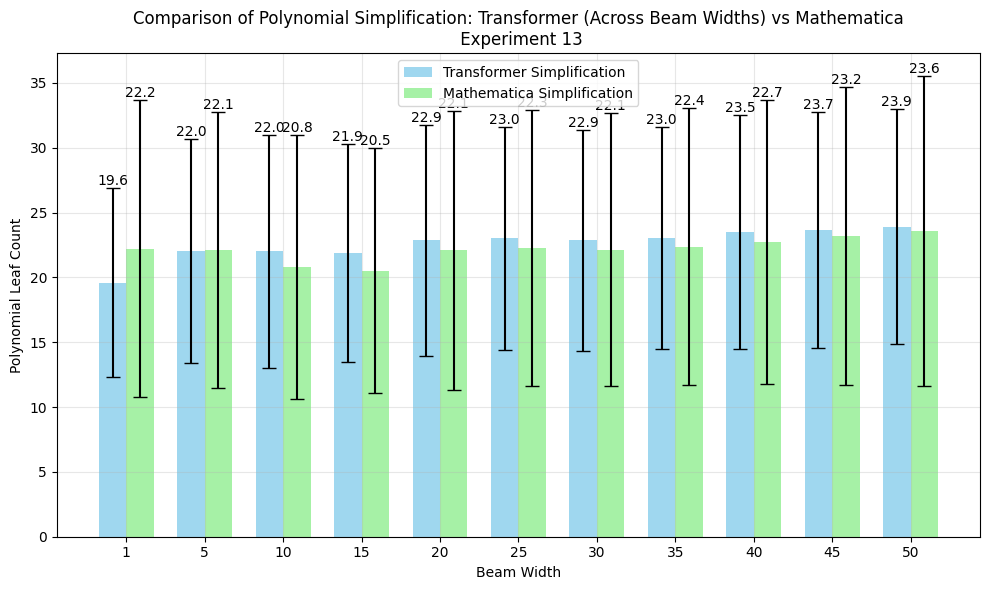

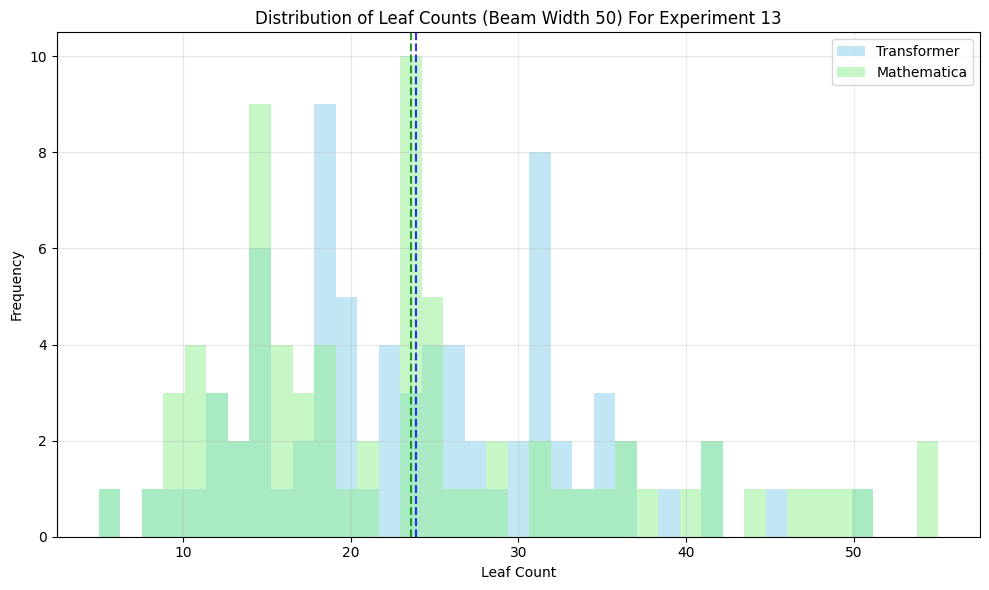

In [73]:
exp_num = 13
# NOTE : Change for each experiment
file_path = "data/data5_test_2_leafcount.txt"
test_cases_leafcount = read_test_cases(file_path)

# NOTE : change for each experiment
exp13_beam_width_results = {1 : [31, 35, 68, 69, 87, 93, 100, 128, 189, 258, 265, 285, 288, 291, 293],
5 : [18, 31, 35, 42, 68, 69, 72, 87, 93, 100, 103, 120, 126, 128, 143, 148, 176, 179, 187, 189, 213, 217, 257, 258, 265, 285, 288, 291, 293, 294],
10 : [17, 18, 24, 31, 35, 42, 68, 69, 72, 78, 85, 87, 93, 100, 103, 120, 126, 128, 143, 148, 176, 179, 187, 189, 203, 206, 213, 214, 217, 221, 257, 258, 265, 272, 284, 285, 288, 289, 291, 293, 294],
15 : [17, 18, 24, 31, 35, 42, 68, 69, 72, 78, 82, 85, 87, 93, 100, 103, 107, 118, 120, 126, 128, 143, 146, 148, 164, 176, 179, 187, 189, 199, 203, 206, 213, 214, 217, 221, 238, 257, 258, 263, 265, 271, 272, 283, 284, 285, 288, 289, 291, 293, 294],
20 : [17, 18, 24, 31, 35, 41, 42, 45, 68, 69, 72, 78, 82, 85, 87, 93, 100, 103, 107, 118, 120, 126, 128, 143, 146, 148, 164, 167, 175, 176, 179, 187, 189, 196, 199, 203, 206, 213, 214, 215, 217, 221, 238, 245, 257, 258, 262, 263, 265, 271, 272, 283, 284, 285, 287, 288, 289, 291, 293, 294],
25 : [6, 17, 18, 24, 31, 35, 41, 42, 45, 54, 68, 69, 72, 78, 82, 85, 87, 93, 100, 103, 107, 118, 120, 126, 128, 143, 146, 148, 163, 164, 167, 175, 176, 179, 187, 189, 196, 199, 203, 206, 213, 214, 215, 217, 218, 221, 238, 240, 245, 257, 258, 262, 263, 265, 271, 272, 283, 284, 285, 287, 288, 289, 291, 293, 294],
30 : [6, 17, 18, 24, 31, 35, 41, 42, 45, 46, 54, 68, 69, 72, 78, 82, 85, 87, 93, 100, 103, 107, 118, 120, 126, 128, 143, 146, 148, 163, 164, 167, 175, 176, 179, 187, 189, 196, 199, 202, 203, 206, 213, 214, 215, 217, 218, 221, 238, 240, 245, 257, 258, 262, 263, 265, 271, 272, 283, 284, 285, 287, 288, 289, 291, 293, 294],
35 : [6, 17, 18, 24, 31, 35, 41, 42, 45, 46, 54, 68, 69, 72, 78, 82, 85, 87, 93, 100, 103, 106, 107, 112, 118, 120, 126, 128, 143, 146, 148, 163, 164, 167, 175, 176, 179, 187, 189, 196, 199, 202, 203, 206, 213, 214, 215, 217, 218, 221, 238, 240, 245, 257, 258, 262, 263, 265, 271, 272, 283, 284, 285, 287, 288, 289, 291, 293, 294],
40 : [6, 17, 18, 24, 31, 35, 41, 42, 45, 46, 54, 68, 69, 72, 78, 82, 85, 87, 93, 100, 103, 106, 107, 112, 118, 120, 126, 128, 143, 146, 148, 158, 163, 164, 167, 175, 176, 179, 187, 189, 196, 199, 202, 203, 205, 206, 213, 214, 215, 217, 218, 221, 238, 240, 245, 257, 258, 262, 263, 265, 271, 272, 283, 284, 285, 287, 288, 289, 291, 293, 294],
45 : [6, 17, 18, 24, 31, 35, 41, 42, 45, 46, 54, 68, 69, 72, 78, 82, 85, 87, 93, 100, 103, 106, 107, 112, 118, 120, 126, 128, 143, 146, 148, 158, 163, 164, 167, 175, 176, 179, 187, 189, 196, 199, 202, 203, 205, 206, 213, 214, 215, 217, 218, 221, 238, 240, 245, 249, 257, 258, 262, 263, 265, 271, 272, 283, 284, 285, 287, 288, 289, 291, 293, 294],
50 : [6, 17, 18, 24, 31, 35, 41, 42, 45, 46, 54, 68, 69, 72, 78, 82, 85, 87, 93, 100, 103, 106, 107, 112, 118, 120, 126, 128, 143, 146, 148, 158, 163, 164, 167, 175, 176, 179, 185, 187, 189, 196, 199, 202, 203, 205, 206, 213, 214, 215, 217, 218, 221, 238, 240, 245, 249, 254, 257, 258, 262, 263, 265, 271, 272, 283, 284, 285, 287, 288, 289, 291, 293, 294]
}

beam_stats = {}

# NOTE : Change for each experiement
for beam_width, correct_indices in exp13_beam_width_results.items():
    correct_cases = get_correct_cases(test_cases_leafcount, correct_indices)
    transformer_leafcount, mma_leafcount = parse_beam_numbers(correct_cases)

    differences = np.array(transformer_leafcount) - np.array(mma_leafcount)
    mean_diff = np.mean(differences)
    std_diff = np.std(differences)

    beam_stats[beam_width] = {
        'transformer_mean': np.mean(transformer_leafcount),
        'transformer_std': np.std(transformer_leafcount),
        'mma_mean': np.mean(mma_leafcount),
        'mma_std': np.std(mma_leafcount),
        'difference_mean': mean_diff,
        'difference_std': std_diff
    }

# Plotting
beam_widths = list(beam_stats.keys())
transformer_means = [stats['transformer_mean'] for stats in beam_stats.values()]
transformer_stds = [stats['transformer_std'] for stats in beam_stats.values()]
mma_means = [stats['mma_mean'] for stats in beam_stats.values()]
mma_stds = [stats['mma_std'] for stats in beam_stats.values()]

# Set up the plot
plt.figure(figsize=(10, 6))
bar_width = 0.35
index = np.arange(len(beam_widths))

# Create bars
plt.bar(index - bar_width/2, transformer_means, bar_width,
        yerr=transformer_stds, label='Transformer Simplification',
        capsize=5, color='skyblue', alpha=0.8)
plt.bar(index + bar_width/2, mma_means, bar_width,
        yerr=mma_stds, label='Mathematica Simplification',
        capsize=5, color='lightgreen', alpha=0.8)

# Customize the plot
plt.xlabel('Beam Width')
plt.ylabel('Polynomial Leaf Count')
plt.title(f'Comparison of Polynomial Simplification: Transformer (Across Beam Widths) vs Mathematica\n Experiment {exp_num}')
plt.xticks(index, beam_widths)
plt.legend()
plt.grid(True, alpha=0.3)

# Add value labels on top of bars
for i, v in enumerate(transformer_means):
    plt.text(i - bar_width/2, v + transformer_stds[i], f'{v:.1f}',
            ha='center', va='bottom')
for i, v in enumerate(mma_means):
    plt.text(i + bar_width/2, v + mma_stds[i], f'{v:.1f}',
            ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Create distribution histogram for beam width 50
plt.figure(figsize=(10, 6))

# Get correct cases for beam width 50
correct_cases_50 = get_correct_cases(test_cases_leafcount, exp13_beam_width_results[50])
transformer_leafcount_50, mma_leafcount_50 = parse_beam_numbers(correct_cases_50)

# Calculate common bins
min_val = min(min(transformer_leafcount_50), min(mma_leafcount_50))
max_val = max(max(transformer_leafcount_50), max(mma_leafcount_50))
bins = np.linspace(min_val, max_val, 40)  # Create 40 equally spaced bins

# Create histogram with transparency and common bins
plt.hist(transformer_leafcount_50, bins=bins, alpha=0.5, label='Transformer', color='skyblue')
plt.hist(mma_leafcount_50, bins=bins, alpha=0.5, label='Mathematica', color='lightgreen')

# Add vertical lines for means
plt.axvline(np.mean(transformer_leafcount_50), color='blue', linestyle='--', alpha=0.8)
plt.axvline(np.mean(mma_leafcount_50), color='green', linestyle='--', alpha=0.8)

# Customize the plot
plt.xlabel('Leaf Count')
plt.ylabel('Frequency')
plt.title(f'Distribution of Leaf Counts (Beam Width 50) For Experiment {exp_num}')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print detailed statistics
# print("\nDetailed Polynomial Simplification Statistics:")
# print("-" * 60)
# for beam_width, stats in beam_stats.items():
#     print(f"\nBeam Width {beam_width}:")
#     print(f"Transformer leaf count: {stats['transformer_mean']:.2f} ± {stats['transformer_std']:.2f}")
#     print(f"Mathematica leaf count: {stats['mma_mean']:.2f} ± {stats['mma_std']:.2f}")
#     print(f"Difference in leaf count: {stats['difference_mean']:.2f} ± {stats['difference_std']:.2f}")


# Exp 16 Leaf Count (Transformer vs. MMA)

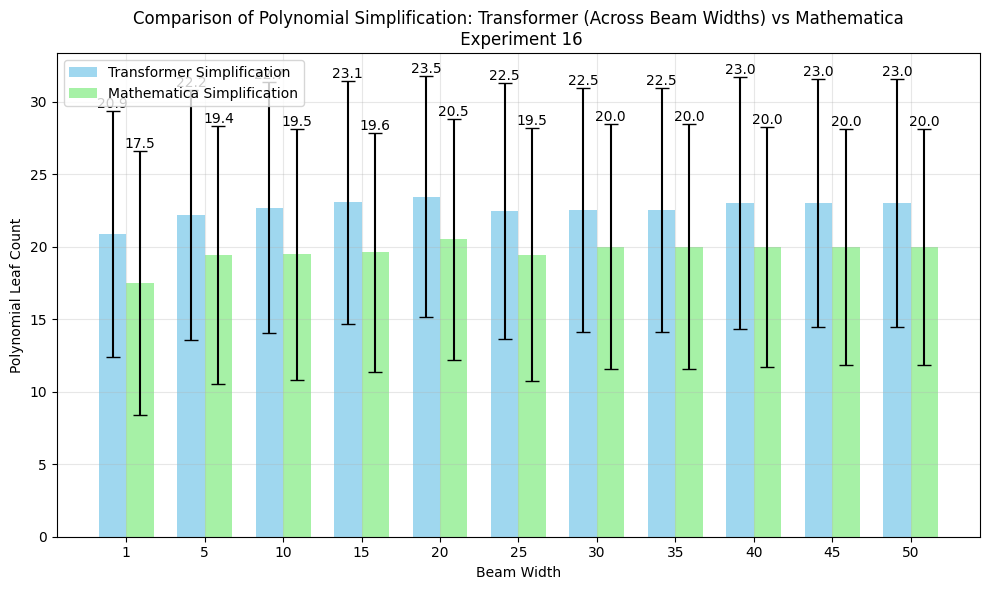

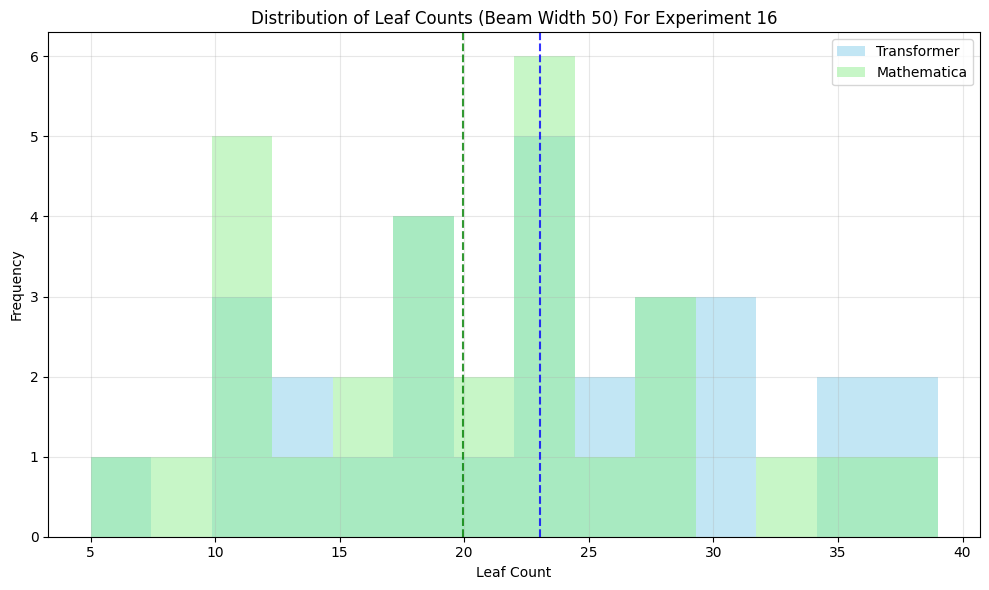

In [74]:
# NOTE : Change for each experiment
exp_num = 16
# NOTE : Change for each experiment
file_path = "data/data8_test_2_leafcount.txt"
test_cases_leafcount = read_test_cases(file_path)

# NOTE : change for each experiment
exp16_beam_width_results = {1 : [70, 85, 135, 212, 217, 229, 271, 275],
5 : [66, 70, 85, 88, 118, 126, 135, 212, 217, 229, 271, 275, 276, 277, 290, 297],
10 : [66, 70, 85, 88, 118, 126, 135, 164, 212, 217, 229, 271, 275, 276, 277, 290, 297],
15 : [66, 70, 85, 88, 118, 126, 135, 144, 153, 164, 212, 217, 229, 271, 275, 276, 277, 290, 297],
20 : [8, 66, 70, 85, 88, 118, 126, 135, 144, 153, 164, 198, 212, 217, 229, 271, 275, 276, 277, 286, 290, 297],
25 : [1, 8, 66, 70, 85, 88, 105, 118, 126, 135, 144, 153, 164, 198, 212, 217, 229, 271, 275, 276, 277, 286, 290, 297],
30 : [1, 8, 34, 66, 70, 85, 88, 105, 118, 124, 126, 135, 144, 153, 164, 168, 198, 212, 217, 229, 271, 275, 276, 277, 286, 290, 297],
35 : [1, 8, 34, 66, 70, 85, 88, 105, 118, 124, 126, 135, 144, 153, 164, 168, 198, 212, 217, 229, 271, 275, 276, 277, 286, 290, 297],
40 : [1, 8, 34, 66, 70, 80, 85, 88, 105, 118, 124, 126, 135, 144, 153, 164, 168, 198, 212, 217, 229, 271, 275, 276, 277, 286, 290, 297],
45 : [1, 8, 34, 46, 66, 70, 80, 85, 88, 105, 118, 124, 126, 135, 144, 153, 164, 168, 198, 212, 217, 229, 271, 275, 276, 277, 286, 290, 297],
50 : [1, 8, 34, 46, 66, 70, 80, 85, 88, 105, 118, 124, 126, 135, 144, 153, 164, 168, 198, 212, 217, 229, 271, 275, 276, 277, 286, 290, 297]}

beam_stats = {}

# NOTE : Change for each experiement
for beam_width, correct_indices in exp16_beam_width_results.items():
    correct_cases = get_correct_cases(test_cases_leafcount, correct_indices)
    transformer_leafcount, mma_leafcount = parse_beam_numbers(correct_cases)

    differences = np.array(transformer_leafcount) - np.array(mma_leafcount)
    mean_diff = np.mean(differences)
    std_diff = np.std(differences)

    beam_stats[beam_width] = {
        'transformer_mean': np.mean(transformer_leafcount),
        'transformer_std': np.std(transformer_leafcount),
        'mma_mean': np.mean(mma_leafcount),
        'mma_std': np.std(mma_leafcount),
        'difference_mean': mean_diff,
        'difference_std': std_diff
    }

# Plotting
beam_widths = list(beam_stats.keys())
transformer_means = [stats['transformer_mean'] for stats in beam_stats.values()]
transformer_stds = [stats['transformer_std'] for stats in beam_stats.values()]
mma_means = [stats['mma_mean'] for stats in beam_stats.values()]
mma_stds = [stats['mma_std'] for stats in beam_stats.values()]

# Set up the plot
plt.figure(figsize=(10, 6))
bar_width = 0.35
index = np.arange(len(beam_widths))

# Create bars
plt.bar(index - bar_width/2, transformer_means, bar_width,
        yerr=transformer_stds, label='Transformer Simplification',
        capsize=5, color='skyblue', alpha=0.8)
plt.bar(index + bar_width/2, mma_means, bar_width,
        yerr=mma_stds, label='Mathematica Simplification',
        capsize=5, color='lightgreen', alpha=0.8)

# Customize the plot
plt.xlabel('Beam Width')
plt.ylabel('Polynomial Leaf Count')
plt.title(f'Comparison of Polynomial Simplification: Transformer (Across Beam Widths) vs Mathematica\n Experiment {exp_num}')
plt.xticks(index, beam_widths)
plt.legend()
plt.grid(True, alpha=0.3)

# Add value labels on top of bars
for i, v in enumerate(transformer_means):
    plt.text(i - bar_width/2, v + transformer_stds[i], f'{v:.1f}',
            ha='center', va='bottom')
for i, v in enumerate(mma_means):
    plt.text(i + bar_width/2, v + mma_stds[i], f'{v:.1f}',
            ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Create distribution histogram for beam width 50
plt.figure(figsize=(10, 6))

# Get correct cases for beam width 50
correct_cases_50 = get_correct_cases(test_cases_leafcount, exp16_beam_width_results[50])
transformer_leafcount_50, mma_leafcount_50 = parse_beam_numbers(correct_cases_50)

# Calculate common bins
min_val = min(min(transformer_leafcount_50), min(mma_leafcount_50))
max_val = max(max(transformer_leafcount_50), max(mma_leafcount_50))
bins = np.linspace(min_val, max_val, 15)  # Create 15 equally spaced bins

# Create histogram with transparency and common bins
plt.hist(transformer_leafcount_50, bins=bins, alpha=0.5, label='Transformer', color='skyblue')
plt.hist(mma_leafcount_50, bins=bins, alpha=0.5, label='Mathematica', color='lightgreen')

# Add vertical lines for means
plt.axvline(np.mean(transformer_leafcount_50), color='blue', linestyle='--', alpha=0.8)
plt.axvline(np.mean(mma_leafcount_50), color='green', linestyle='--', alpha=0.8)

# Customize the plot
plt.xlabel('Leaf Count')
plt.ylabel('Frequency')
plt.title(f'Distribution of Leaf Counts (Beam Width 50) For Experiment {exp_num}')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print detailed statistics
# print("\nDetailed Polynomial Simplification Statistics:")
# print("-" * 60)
# for beam_width, stats in beam_stats.items():
#     print(f"\nBeam Width {beam_width}:")
#     print(f"Transformer leaf count: {stats['transformer_mean']:.2f} ± {stats['transformer_std']:.2f}")
#     print(f"Mathematica leaf count: {stats['mma_mean']:.2f} ± {stats['mma_std']:.2f}")
#     print(f"Difference in leaf count: {stats['difference_mean']:.2f} ± {stats['difference_std']:.2f}")


# Exp 14 Leaf Count (Transformer vs. MMA)

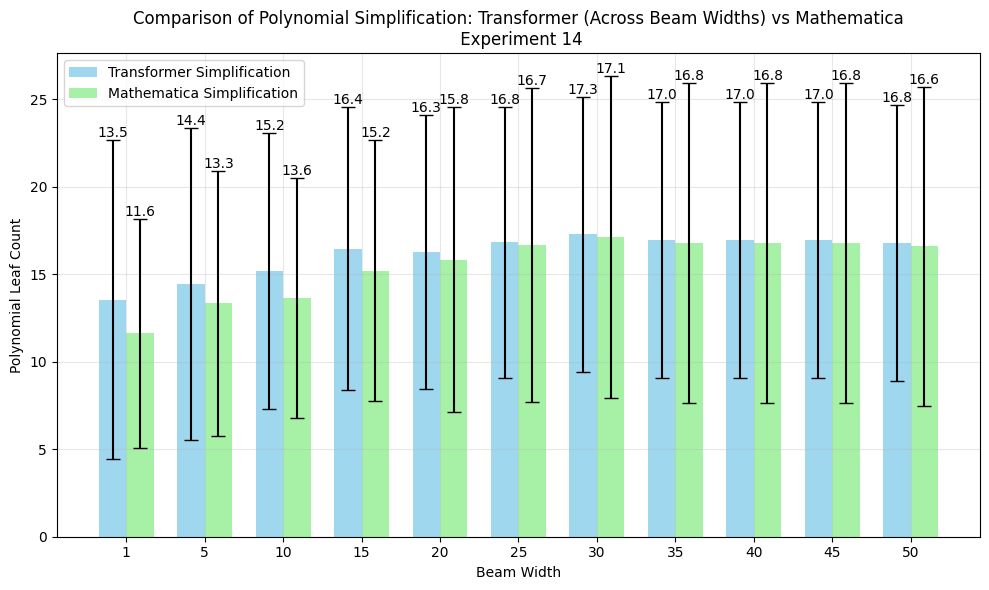

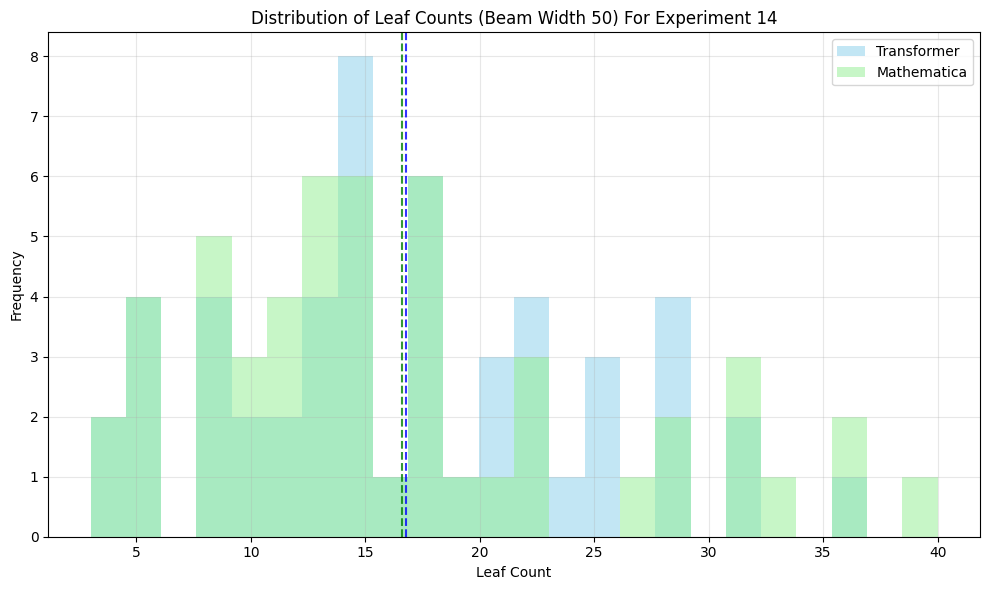

In [75]:
# NOTE : Change for each experiment
exp_num = 14
# NOTE : Change for each experiment
file_path = "data/data6_test_2_leafcount.txt"
test_cases_leafcount = read_test_cases(file_path)

# NOTE : change for each experiment
exp14_beam_width_results = {1 : [18, 61, 100, 106, 112, 113, 155, 179, 222, 226, 241, 245, 249],
5 : [18, 25, 61, 100, 106, 112, 113, 125, 155, 179, 181, 191, 200, 222, 226, 241, 245, 249],
10 : [18, 25, 33, 39, 61, 76, 100, 106, 112, 113, 125, 155, 179, 181, 189, 191, 200, 222, 226, 241, 245, 249, 261, 271, 275, 277, 278, 280],
15 : [18, 25, 33, 39, 61, 64, 73, 76, 86, 100, 106, 112, 113, 125, 155, 179, 181, 189, 191, 200, 219, 222, 226, 227, 241, 242, 245, 249, 261, 271, 275, 277, 278, 280],
20 : [18, 25, 33, 36, 39, 61, 64, 73, 75, 76, 86, 100, 106, 112, 113, 124, 125, 128, 129, 155, 179, 181, 184, 189, 191, 200, 219, 222, 226, 227, 241, 242, 245, 249, 261, 269, 271, 275, 277, 278, 280],
25 : [8, 13, 18, 25, 33, 36, 39, 59, 61, 64, 73, 74, 75, 76, 86, 100, 106, 112, 113, 124, 125, 128, 129, 140, 155, 179, 181, 184, 189, 191, 200, 219, 222, 226, 227, 241, 242, 245, 249, 261, 269, 271, 275, 277, 278, 280],
30 : [8, 13, 18, 25, 33, 36, 39, 59, 61, 62, 64, 73, 74, 75, 76, 83, 86, 100, 106, 112, 113, 124, 125, 128, 129, 140, 155, 179, 181, 184, 189, 191, 200, 219, 222, 226, 227, 241, 242, 245, 249, 261, 269, 271, 275, 277, 278, 280],
35 : [8, 11, 13, 18, 25, 33, 36, 39, 59, 61, 62, 64, 73, 74, 75, 76, 83, 86, 100, 106, 112, 113, 124, 125, 128, 129, 140, 155, 179, 181, 184, 189, 191, 200, 208, 219, 222, 226, 227, 241, 242, 245, 249, 261, 269, 271, 275, 277, 278, 280],
40 : [8, 11, 13, 18, 25, 33, 36, 39, 59, 61, 62, 64, 73, 74, 75, 76, 83, 86, 100, 106, 112, 113, 124, 125, 128, 129, 140, 155, 179, 181, 184, 189, 191, 200, 208, 219, 222, 226, 227, 241, 242, 245, 249, 261, 269, 271, 275, 277, 278, 280],
45 : [8, 11, 13, 18, 25, 33, 36, 39, 59, 61, 62, 64, 73, 74, 75, 76, 83, 86, 100, 106, 112, 113, 124, 125, 128, 129, 140, 155, 179, 181, 184, 189, 191, 200, 208, 219, 222, 226, 227, 241, 242, 245, 249, 261, 269, 271, 275, 277, 278, 280],
50 : [4, 8, 11, 13, 18, 25, 33, 36, 39, 59, 61, 62, 64, 73, 74, 75, 76, 83, 86, 100, 106, 112, 113, 124, 125, 128, 129, 140, 155, 169, 179, 181, 184, 189, 191, 200, 208, 219, 222, 226, 227, 241, 242, 245, 249, 261, 269, 271, 275, 277, 278, 280]}

beam_stats = {}

# NOTE : Change for each experiement
for beam_width, correct_indices in exp14_beam_width_results.items():
    correct_cases = get_correct_cases(test_cases_leafcount, correct_indices)
    transformer_leafcount, mma_leafcount = parse_beam_numbers(correct_cases)

    differences = np.array(transformer_leafcount) - np.array(mma_leafcount)
    mean_diff = np.mean(differences)
    std_diff = np.std(differences)

    beam_stats[beam_width] = {
        'transformer_mean': np.mean(transformer_leafcount),
        'transformer_std': np.std(transformer_leafcount),
        'mma_mean': np.mean(mma_leafcount),
        'mma_std': np.std(mma_leafcount),
        'difference_mean': mean_diff,
        'difference_std': std_diff
    }

# Plotting
beam_widths = list(beam_stats.keys())
transformer_means = [stats['transformer_mean'] for stats in beam_stats.values()]
transformer_stds = [stats['transformer_std'] for stats in beam_stats.values()]
mma_means = [stats['mma_mean'] for stats in beam_stats.values()]
mma_stds = [stats['mma_std'] for stats in beam_stats.values()]

# Set up the plot
plt.figure(figsize=(10, 6))
bar_width = 0.35
index = np.arange(len(beam_widths))

# Create bars
plt.bar(index - bar_width/2, transformer_means, bar_width,
        yerr=transformer_stds, label='Transformer Simplification',
        capsize=5, color='skyblue', alpha=0.8)
plt.bar(index + bar_width/2, mma_means, bar_width,
        yerr=mma_stds, label='Mathematica Simplification',
        capsize=5, color='lightgreen', alpha=0.8)

# Customize the plot
plt.xlabel('Beam Width')
plt.ylabel('Polynomial Leaf Count')
plt.title(f'Comparison of Polynomial Simplification: Transformer (Across Beam Widths) vs Mathematica\n Experiment {exp_num}')
plt.xticks(index, beam_widths)
plt.legend()
plt.grid(True, alpha=0.3)

# Add value labels on top of bars
for i, v in enumerate(transformer_means):
    plt.text(i - bar_width/2, v + transformer_stds[i], f'{v:.1f}',
            ha='center', va='bottom')
for i, v in enumerate(mma_means):
    plt.text(i + bar_width/2, v + mma_stds[i], f'{v:.1f}',
            ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Create distribution histogram for beam width 50
plt.figure(figsize=(10, 6))

# Get correct cases for beam width 50
correct_cases_50 = get_correct_cases(test_cases_leafcount, exp14_beam_width_results[50])
transformer_leafcount_50, mma_leafcount_50 = parse_beam_numbers(correct_cases_50)

# Calculate common bins
min_val = min(min(transformer_leafcount_50), min(mma_leafcount_50))
max_val = max(max(transformer_leafcount_50), max(mma_leafcount_50))
bins = np.linspace(min_val, max_val, 25)  # Create 25 equally spaced bins

# Create histogram with transparency and common bins
plt.hist(transformer_leafcount_50, bins=bins, alpha=0.5, label='Transformer', color='skyblue')
plt.hist(mma_leafcount_50, bins=bins, alpha=0.5, label='Mathematica', color='lightgreen')

# Add vertical lines for means
plt.axvline(np.mean(transformer_leafcount_50), color='blue', linestyle='--', alpha=0.8)
plt.axvline(np.mean(mma_leafcount_50), color='green', linestyle='--', alpha=0.8)

# Customize the plot
plt.xlabel('Leaf Count')
plt.ylabel('Frequency')
plt.title(f'Distribution of Leaf Counts (Beam Width 50) For Experiment {exp_num}')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print detailed statistics
# print("\nDetailed Polynomial Simplification Statistics:")
# print("-" * 60)
# for beam_width, stats in beam_stats.items():
#     print(f"\nBeam Width {beam_width}:")
#     print(f"Transformer leaf count: {stats['transformer_mean']:.2f} ± {stats['transformer_std']:.2f}")
#     print(f"Mathematica leaf count: {stats['mma_mean']:.2f} ± {stats['mma_std']:.2f}")
#     print(f"Difference in leaf count: {stats['difference_mean']:.2f} ± {stats['difference_std']:.2f}")


# Exp 15 Leaf Count (Transformer vs. MMA)

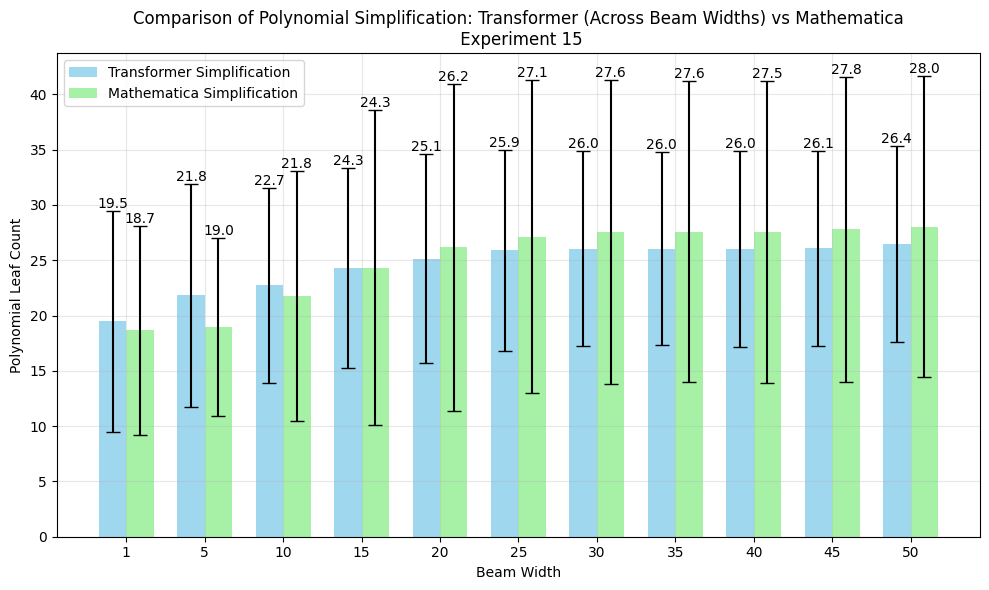

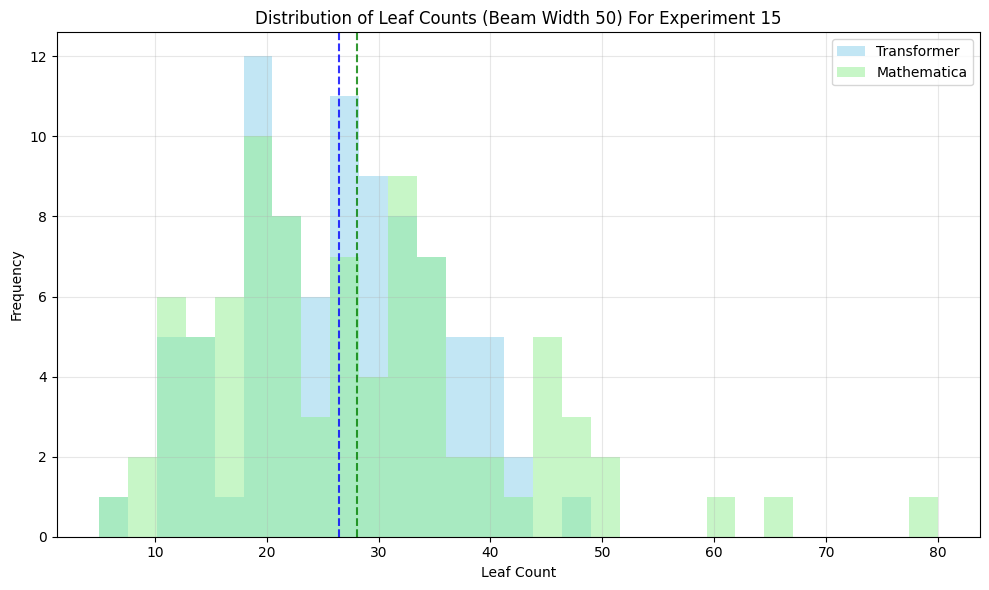

In [76]:
# NOTE : Change for each experiment
exp_num = 15
# NOTE : Change for each experiment
file_path = "data/data7_test_2_leafcount.txt"
test_cases_leafcount = read_test_cases(file_path)

# NOTE : change for each experiment
exp15_beam_width_results = {1 : [6, 13, 20, 54, 75, 82, 119, 122, 124, 134, 153, 240, 241, 282, 285],
5 : [6, 10, 13, 20, 42, 54, 67, 75, 82, 111, 119, 122, 123, 124, 134, 148, 153, 162, 240, 241, 248, 252, 282, 285],
10 : [6, 10, 13, 17, 20, 32, 42, 48, 54, 67, 75, 79, 82, 93, 106, 110, 111, 115, 119, 122, 123, 124, 125, 134, 146, 148, 153, 162, 190, 191, 222, 240, 241, 243, 248, 252, 257, 282, 285, 290, 295],
15 : [0, 6, 10, 11, 13, 17, 18, 20, 27, 32, 42, 48, 52, 54, 57, 67, 75, 79, 82, 93, 106, 110, 111, 115, 119, 122, 123, 124, 125, 134, 146, 148, 153, 162, 190, 191, 196, 222, 236, 239, 240, 241, 243, 248, 252, 257, 282, 285, 290, 295],
20 : [0, 6, 10, 11, 13, 17, 18, 20, 27, 32, 39, 42, 48, 52, 54, 57, 67, 71, 75, 79, 82, 93, 101, 102, 106, 110, 111, 115, 119, 122, 123, 124, 125, 133, 134, 146, 148, 153, 162, 190, 191, 196, 197, 222, 236, 239, 240, 241, 243, 248, 252, 257, 273, 282, 285, 290, 295],
25 : [0, 6, 10, 11, 13, 14, 17, 18, 20, 27, 32, 34, 39, 42, 48, 52, 54, 57, 67, 71, 75, 78, 79, 82, 93, 101, 102, 106, 110, 111, 115, 119, 122, 123, 124, 125, 133, 134, 146, 148, 151, 153, 162, 178, 188, 190, 191, 196, 197, 211, 216, 222, 236, 239, 240, 241, 242, 243, 248, 252, 257, 262, 273, 282, 283, 285, 290, 295, 299],
30 : [0, 6, 10, 11, 13, 14, 17, 18, 20, 27, 32, 34, 39, 42, 48, 51, 52, 54, 57, 67, 71, 75, 78, 79, 82, 90, 93, 100, 101, 102, 106, 110, 111, 113, 115, 119, 122, 123, 124, 125, 129, 133, 134, 146, 148, 150, 151, 153, 162, 178, 188, 190, 191, 196, 197, 202, 211, 216, 222, 236, 239, 240, 241, 242, 243, 248, 252, 257, 262, 273, 282, 283, 285, 290, 291, 295, 298, 299],
35 : [0, 6, 10, 11, 13, 14, 17, 18, 20, 27, 32, 34, 39, 42, 48, 51, 52, 54, 57, 67, 71, 75, 78, 79, 82, 90, 93, 100, 101, 102, 106, 110, 111, 113, 115, 119, 122, 123, 124, 125, 129, 133, 134, 146, 148, 150, 151, 153, 162, 178, 188, 190, 191, 196, 197, 202, 211, 216, 217, 222, 224, 236, 239, 240, 241, 242, 243, 248, 252, 257, 262, 273, 282, 283, 285, 290, 291, 295, 298, 299],
40 : [0, 6, 10, 11, 13, 14, 17, 18, 20, 27, 32, 34, 39, 42, 48, 51, 52, 54, 57, 67, 71, 75, 78, 79, 82, 90, 93, 97, 100, 101, 102, 106, 110, 111, 113, 115, 119, 122, 123, 124, 125, 129, 133, 134, 138, 146, 148, 150, 151, 153, 162, 178, 188, 190, 191, 196, 197, 202, 211, 216, 217, 222, 224, 236, 239, 240, 241, 242, 243, 248, 252, 257, 262, 273, 282, 283, 285, 290, 291, 295, 298, 299],
45 : [0, 6, 10, 11, 13, 14, 17, 18, 20, 27, 32, 34, 39, 42, 48, 51, 52, 54, 57, 67, 71, 75, 78, 79, 82, 90, 93, 97, 100, 101, 102, 106, 110, 111, 113, 115, 119, 122, 123, 124, 125, 129, 133, 134, 138, 146, 148, 150, 151, 153, 162, 178, 188, 190, 191, 196, 197, 202, 211, 216, 217, 222, 224, 236, 239, 240, 241, 242, 243, 248, 252, 257, 262, 268, 273, 282, 283, 285, 290, 291, 295, 298, 299],
50 : [0, 6, 10, 11, 13, 14, 17, 18, 20, 27, 32, 34, 39, 42, 48, 51, 52, 54, 57, 67, 71, 75, 78, 79, 82, 90, 93, 97, 100, 101, 102, 106, 110, 111, 113, 115, 119, 122, 123, 124, 125, 129, 133, 134, 138, 146, 148, 150, 151, 153, 162, 178, 188, 190, 191, 196, 197, 200, 202, 211, 216, 217, 222, 224, 236, 239, 240, 241, 242, 243, 247, 248, 252, 256, 257, 262, 268, 273, 282, 283, 285, 290, 291, 295, 298, 299],
}

beam_stats = {}

# NOTE : Change for each experiement
for beam_width, correct_indices in exp15_beam_width_results.items():
    correct_cases = get_correct_cases(test_cases_leafcount, correct_indices)
    transformer_leafcount, mma_leafcount = parse_beam_numbers(correct_cases)

    differences = np.array(transformer_leafcount) - np.array(mma_leafcount)
    mean_diff = np.mean(differences)
    std_diff = np.std(differences)

    beam_stats[beam_width] = {
        'transformer_mean': np.mean(transformer_leafcount),
        'transformer_std': np.std(transformer_leafcount),
        'mma_mean': np.mean(mma_leafcount),
        'mma_std': np.std(mma_leafcount),
        'difference_mean': mean_diff,
        'difference_std': std_diff
    }

# Plotting
beam_widths = list(beam_stats.keys())
transformer_means = [stats['transformer_mean'] for stats in beam_stats.values()]
transformer_stds = [stats['transformer_std'] for stats in beam_stats.values()]
mma_means = [stats['mma_mean'] for stats in beam_stats.values()]
mma_stds = [stats['mma_std'] for stats in beam_stats.values()]

# Set up the plot
plt.figure(figsize=(10, 6))
bar_width = 0.35
index = np.arange(len(beam_widths))

# Create bars
plt.bar(index - bar_width/2, transformer_means, bar_width,
        yerr=transformer_stds, label='Transformer Simplification',
        capsize=5, color='skyblue', alpha=0.8)
plt.bar(index + bar_width/2, mma_means, bar_width,
        yerr=mma_stds, label='Mathematica Simplification',
        capsize=5, color='lightgreen', alpha=0.8)

# Customize the plot
plt.xlabel('Beam Width')
plt.ylabel('Polynomial Leaf Count')
plt.title(f'Comparison of Polynomial Simplification: Transformer (Across Beam Widths) vs Mathematica\n Experiment {exp_num}')
plt.xticks(index, beam_widths)
plt.legend()
plt.grid(True, alpha=0.3)

# Add value labels on top of bars
for i, v in enumerate(transformer_means):
    plt.text(i - bar_width/2, v + transformer_stds[i], f'{v:.1f}',
            ha='center', va='bottom')
for i, v in enumerate(mma_means):
    plt.text(i + bar_width/2, v + mma_stds[i], f'{v:.1f}',
            ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Create distribution histogram for beam width 50
plt.figure(figsize=(10, 6))

# Get correct cases for beam width 50
correct_cases_50 = get_correct_cases(test_cases_leafcount, exp15_beam_width_results[50])
transformer_leafcount_50, mma_leafcount_50 = parse_beam_numbers(correct_cases_50)

# Calculate common bins
min_val = min(min(transformer_leafcount_50), min(mma_leafcount_50))
max_val = max(max(transformer_leafcount_50), max(mma_leafcount_50))
bins = np.linspace(min_val, max_val, 30)  # Create 40 equally spaced bins

# Create histogram with transparency and common bins
plt.hist(transformer_leafcount_50, bins=bins, alpha=0.5, label='Transformer', color='skyblue')
plt.hist(mma_leafcount_50, bins=bins, alpha=0.5, label='Mathematica', color='lightgreen')

# Add vertical lines for means
plt.axvline(np.mean(transformer_leafcount_50), color='blue', linestyle='--', alpha=0.8)
plt.axvline(np.mean(mma_leafcount_50), color='green', linestyle='--', alpha=0.8)

# Customize the plot
plt.xlabel('Leaf Count')
plt.ylabel('Frequency')
plt.title(f'Distribution of Leaf Counts (Beam Width 50) For Experiment {exp_num}')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print detailed statistics
# print("\nDetailed Polynomial Simplification Statistics:")
# print("-" * 60)
# for beam_width, stats in beam_stats.items():
#     print(f"\nBeam Width {beam_width}:")
#     print(f"Transformer leaf count: {stats['transformer_mean']:.2f} ± {stats['transformer_std']:.2f}")
#     print(f"Mathematica leaf count: {stats['mma_mean']:.2f} ± {stats['mma_std']:.2f}")
#     print(f"Difference in leaf count: {stats['difference_mean']:.2f} ± {stats['difference_std']:.2f}")


In [ ]:
from sympy import Symbol, Wild, expand, simplify
import re

def preprocess_tokens(expr):
    """
    Converts tokens like:
      P 4 5 0 => '450'
      N 3 7 5 => '-375'
      P 1 2 . 5 => '12.5'
    and leaves other tokens intact.
    """
    tokens = expr.split()
    processed = []
    i = 0
    while i < len(tokens):
        if tokens[i] in ['P', 'N']:
            sign = '' if tokens[i] == 'P' else '-'
            i += 1
            num_str = ''
            while i < len(tokens) and tokens[i].replace('.', '').isdigit():
                num_str += tokens[i]
                i += 1

            if num_str:
                processed.append(sign + num_str)
            else:
                processed.append(sign + "1")
        else:
            processed.append(tokens[i])
            i += 1

    return processed

def parse_prefix_notation(expr):
    tokens = preprocess_tokens(expr)
    print(f"Tokens to parse: {tokens}")
    pos = [0]

    def parse():
        if pos[0] >= len(tokens):
            return None

        token = tokens[pos[0]]
        pos[0] += 1

        if token in ['+', '*', '^']:
            left = parse()
            if left is None:
                return None
            right = parse()
            if right is None:
                if pos[0] >= len(tokens):
                    return left
                return None
            return (token, left, right)
        elif token.replace('-', '').replace('.', '').isdigit():
            return ('NUM', float(token))
        else:
            return ('VAR', token)

    try:
        result = parse()
        if pos[0] != len(tokens):
            print(f"Warning: Not all tokens consumed. Stopped at position {pos[0]} of {len(tokens)}")
        return result
    except Exception as e:
        print(f"Parse error: {str(e)}")
        return None

def build_sympy_expr(tree):
    if tree is None:
        return None

    op, *args = tree
    if op == '+':
        return build_sympy_expr(args[0]) + build_sympy_expr(args[1])
    elif op == '*':
        return build_sympy_expr(args[0]) * build_sympy_expr(args[1])
    elif op == '^':
        return build_sympy_expr(args[0]) ** build_sympy_expr(args[1])
    elif op == 'NUM':
        return args[0]
    elif op == 'VAR':
        return Symbol(args[0])

def match_polynomial(input_str):
    """
    Splits input at '?' into an expression (prefix) and a target (prefix).
    Parses both, builds Sympy expressions, then attempts a match.
    """
    parts = input_str.split('?')
    if len(parts) != 2:
        return "Invalid input format: missing ?"

    expr_str = parts[0].strip()
    target_str = parts[1].strip()

    expr_tree = parse_prefix_notation(expr_str)
    target_tree = parse_prefix_notation(target_str)

    if expr_tree is None or target_tree is None:
        return "Invalid expression format"

    expr = simplify(build_sympy_expr(expr_tree))
    target = build_sympy_expr(target_tree)

    # Create wildcard placeholders if you want them
    wilds = {f'b{i}': Wild(f'b{i}', exclude=[0]) for i in range(5)}
    target_with_wilds = target.subs(wilds)

    try:
        match = expr.match(target_with_wilds)
        return match if match else "No match found"
    except Exception as e:
        return f"Matching error: {str(e)}"

# Quick demonstration:
test_input = """+ * N 3 7 5 * ^ a0 P 3 ^ a1 P 6 + * P 4 5 0 * ^ a0 P 4 * ^ a1 P 4 a2 ? + * P 3 ^ b1 P 3 + * N 5 * b1 ^ b2 P 2 * P 5 ^ b2 P 3"""
print("Preprocessed tokens for the expression side:\n", preprocess_tokens(test_input.split('?')[0]))
res = match_polynomial(test_input)
print("Match result:", res)


Preprocessed tokens for the expression side:
 ['+', '*', '-375', '*', '^', 'a0', '3', '^', 'a1', '6', '+', '*', '450', '*', '^', 'a0', '4', '*', '^', 'a1', '4', 'a2']
Tokens to parse: ['+', '*', '-375', '*', '^', 'a0', '3', '^', 'a1', '6', '+', '*', '450', '*', '^', 'a0', '4', '*', '^', 'a1', '4', 'a2']
Tokens to parse: ['+', '*', '3', '^', 'b1', '3', '+', '*', '-5', '*', 'b1', '^', 'b2', '2', '*', '5', '^', 'b2', '3']
Match result: No match found


In [36]:
test_cases = [
    # Basic matching
    """+ * N 1 3 5 * ^ a0 P 6 ^ a1 P 3 + * P 1 8 * ^ a0 P 5 ^ a1 P 4 + * N 3 * ^ a0 P 4 ^ a1 P 5 + * P 9 * ^ a0 P 2 ^ a1 P 7 + * P 1 8 * ^ a0 P 4 * ^ a1 P 4 a2 * P 9 * ^ a0 P 6 * a1 ^ a2 P 2 ? + * P 3 * ^ b0 P 2 b1 + * N 4 ^ b1 P 3 * N 1 * b1 ^ b2 P 2 """,

    # Multiple terms
    """+ * P 4 8 * ^ a0 P 4 * ^ a1 P 2 ^ a2 P 3 + * P 4 * ^ a0 P 2 * ^ a1 P 4 ^ a2 P 3 + * P 1 9 2 * ^ a0 P 4 * a1 ^ a2 P 4 + * P 5 6 * ^ a0 P 2 * ^ a1 P 3 ^ a2 P 4 + * ^ a1 P 5 ^ a2 P 4 + * P 2 0 8 * ^ a0 P 2 * ^ a1 P 2 ^ a2 P 5 + * P 1 3 * ^ a1 P 4 ^ a2 P 5 + * P 1 9 2 * ^ a0 P 2 * a1 ^ a2 P 6 + * P 5 6 * ^ a1 P 3 ^ a2 P 6 + * P 9 2 * ^ a1 P 2 ^ a2 P 7 * P 4 8 * a1 ^ a2 P 8 ? + * ^ b0 P 2 b1 * N 3 * b0 ^ b1 P 2 """,

    # Negative coefficients
    """+ * N 4 8 ^ a0 P 9 + * N 3 6 * ^ a0 P 6 ^ a1 P 3 + * N 1 7 0 * ^ a0 P 7 ^ a2 P 2 + * P 1 2 * ^ a0 P 6 * a1 ^ a2 P 2 + * P 9 * ^ a0 P 3 * ^ a1 P 4 ^ a2 P 2 + * P 8 0 * ^ a0 P 4 * a1 ^ a2 P 4 * N 1 0 * a0 * ^ a1 P 2 ^ a2 P 6 ? + * P 3 * b0 * b1 b2 + * P 5 * ^ b1 P 2 b3 * P 5 * ^ b2 P 2 b3""",

    # Higher powers
    """* ^ a0 P 3 ^ a1 P 2 ? * ^ b1 P 3 b2""",

    # Mixed terms
    """+ * P 2 a0 * N 3 ^ a1 P 2 ? + * b1 b2 * b3 ^ b4 P 2""",

    # Complex coefficients
    """+ * N 1 2 5 ^ a0 P 2 * P 7 5 a1 ? + * b1 ^ b2 P 2 * b3 b2""",

    # Nested operations
    """+ * P 2 * ^ a0 P 2 a1 * P 3 * a0 ^ a1 P 2 ? + * b1 * b2 b3 * b4 * b2 ^ b3 P 2""",
]